Baixei as biblioteca utilizadas no curso e retirei as que não foram necessarias.

**Análise exploratória de dados**

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [ ]:
url_dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00611/accelerometer.csv'
df = pd.read_csv(url_dados)

utilizei a url direto do site UCI https://archive.ics.uci.edu/ml/datasets/Accelerometer

Escolhi utilizar o Accelerometer Data Set (Dados do acelerômetro a partir de vibrações de um ventilador mais frio com pesos em suas pás. Ele pode ser usado para previsões, classificação e outras tarefas que exigem análise de vibração, especialmente em motores.)

O acelerômetro ou acelerómetro é um dispositivo usado para medir a aceleração própria de um sistema. O conceito de aceleração própria surgiu em 1915 com os trabalhos de Albert Einstein sobre a Teoria da Relatividade Geral.

In [ ]:
# Plotando para ver se importou a tabela
df.head(10)

wconfid  pctid      x      y      z
0        1     20  1.004  0.090 -0.125
1        1     20  1.004 -0.043 -0.125
2        1     20  0.969  0.090 -0.121
3        1     20  0.973 -0.012 -0.137
4        1     20  1.000 -0.016 -0.121
5        1     20  0.961  0.082 -0.121
6        1     20  0.973 -0.055 -0.109
7        1     20  1.000  0.012 -0.133
8        1     20  0.969 -0.102 -0.141
9        1     20  0.973 -0.059 -0.125

In [ ]:
# exibindo as últimas linhas
df.tail(10)

wconfid  pctid      x      y      z
152990        3    100  0.832  0.195 -0.305
152991        3    100  1.148 -0.023  0.289
152992        3    100  0.887  0.000 -0.469
152993        3    100  1.090  0.258  0.121
152994        3    100  0.703 -0.207  0.043
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

O código df.head(10) mostra as 10 primeiras linhas do seu conjunto de dados e é útil para entender a estrutura e o conteúdo dos seus dados. Ele ajuda a garantir que a leitura dos dados foi feita corretamente e a identificar as primeiras informações registradas.

Já o código df.tail(10) mostra as 10 últimas linhas do conjunto de dados e pode ajudar a identificar possíveis problemas ou inconsistências nos registros. Ele garante que os dados estão completos e que não há informações faltando no final da coleta dos dados.

Esses códigos são úteis para obter uma visão geral do conjunto de dados e verificar se as informações mostradas fazem sentido para o seu projeto. Caso precise de ajuda adicional na análise dos dados, fique à vontade para perguntar.

In [ ]:
# exibir a quantidade de linhas por colunas
df.count()

wconfid    153000
pctid      153000
x          153000
y          153000
z          153000
dtype: int64

In [ ]:
# exibindo as dimensões do dataset
df.shape

(153000, 5)

In [ ]:
# Verificando se realmente é um dataframe
type(df)

pandas.core.frame.DataFrame

Fazendo a verificação se o df é um DataFrame, caso não seja os codigos abaixo não seram executados.

In [ ]:
# verificando os tipos de cada coluna do dataframe
df.dtypes

wconfid      int64
pctid        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [ ]:
# exibindo os nomes das colunas
df.columns

Index(['wconfid', 'pctid', 'x', 'y', 'z'], dtype='object')

In [ ]:
# exibindo um sumário estatístico (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

wconfid          pctid              x              y  \
count  153000.000000  153000.000000  153000.000000  153000.000000   
mean        2.000000      60.000000       0.995622       0.005351   
std         0.816499      24.494977       0.773958       0.742602   
min         1.000000      20.000000      -8.000000      -8.000000   
25%         1.000000      40.000000       0.945000      -0.078000   
50%         2.000000      60.000000       0.992000       0.008000   
75%         3.000000      80.000000       1.039000       0.105000   
max         3.000000     100.000000       7.996000       7.996000   

                   z  
count  153000.000000  
mean       -0.117769  
std         0.517008  
min        -5.867000  
25%        -0.172000  
50%        -0.125000  
75%        -0.066000  
max         6.086000

Com a função describe conseguimos ver que a maior parte da movimentação que temos é no wconfid 3.0 e depois que o pctid passa do 80. Com os gráficos posteriores essa visualização fica mais clara.

In [ ]:
# ordenando o dataframe por uma coluna
df.sort_values(by='x')

wconfid  pctid      x      y      z
99808        2    100 -8.000 -2.617  0.363
47552        1     95 -8.000 -1.695  1.496
43161        1     90 -8.000  1.711  0.695
50017        1    100 -7.926 -4.023  1.574
49965        1    100 -7.848 -1.949 -0.160
...        ...    ...    ...    ...    ...
45469        1     95  7.996  0.762  3.363
50402        1    100  7.996  1.812  3.871
50915        1    100  7.996 -0.629  4.992
38324        1     80  7.996 -2.520 -2.242
42597        1     90  7.996  0.316  3.379

[153000 rows x 5 columns]

In [ ]:
# ordenando o dataframe por uma coluna
df.sort_values(by='y')

wconfid  pctid      x      y      z
45134        1     95  0.094 -8.000  1.703
45778        1     95 -0.414 -8.000  0.973
45273        1     95 -1.570 -8.000 -0.387
49145        1    100  0.520 -8.000  0.270
45352        1     95  1.910 -8.000 -3.730
...        ...    ...    ...    ...    ...
99446        2    100 -0.863  7.313 -2.984
97176        2     95 -2.734  7.391  1.578
50616        1    100 -0.953  7.520  0.129
50285        1    100 -0.004  7.992 -3.195
47023        1     95 -0.703  7.996  1.527

[153000 rows x 5 columns]

In [ ]:

# ordenando o dataframe por uma coluna
df.sort_values(by='z')

wconfid  pctid      x      y      z
49202        1    100 -3.609  3.086 -5.867
48079        1    100 -0.004 -3.320 -5.293
45728        1     95 -3.492  1.465 -5.137
50521        1    100 -2.086  3.621 -5.090
46488        1     95  0.664  2.168 -5.059
...        ...    ...    ...    ...    ...
98350        2     95  0.184  0.688  4.723
98642        2     95 -1.543 -3.434  4.793
45473        1     95 -1.738  0.980  4.855
50915        1    100  7.996 -0.629  4.992
97280        2     95 -0.168 -1.559  6.086

[153000 rows x 5 columns]

A função df.sort_values(by='x') é usada para ordenar o DataFrame df com base nos valores de uma coluna específica, no caso, a coluna x.

A ordenação é realizada em ordem crescente, ou seja, os valores menores para a coluna x aparecerão primeiro no DataFrame ordenado. Caso seja necessário ordenar em ordem decrescente, basta adicionar o parâmetro ascending=False dentro da função.

Essa função é útil para facilitar a visualização e análise dos dados, tornando mais fácil a identificação de tendências e padrões nos valores de uma determinada coluna. É importante lembrar que, ao utilizar a ordenação, os outros valores nas outras colunas do DataFrame também são rearranjados de acordo com a ordem de classificação definida.

In [ ]:
df.loc[:,['x', 'y', 'z']]

x      y      z
0       1.004  0.090 -0.125
1       1.004 -0.043 -0.125
2       0.969  0.090 -0.121
3       0.973 -0.012 -0.137
4       1.000 -0.016 -0.121
...       ...    ...    ...
152995  1.051  0.090 -0.262
152996  0.918  0.039 -0.129
152997  1.156 -0.094 -0.227
152998  0.934  0.203 -0.172
152999  1.199 -0.176  0.109

[153000 rows x 3 columns]

In [ ]:
# selecionando linhas segundo um critério
df[df['x'] > 3]

wconfid  pctid      x      y      z
33299         1     75  3.145  0.227 -0.320
33301         1     75  4.473  3.254 -1.316
33311         1     75  3.180  1.426 -0.496
33362         1     75  3.906  0.219 -1.887
33399         1     75  4.457 -0.871 -0.063
...         ...    ...    ...    ...    ...
101942        2    100  3.629 -1.484  1.047
101952        2    100  3.172  0.348 -1.062
101960        2    100  4.016 -0.785 -0.082
101986        2    100  3.043 -1.625  0.438
101987        2    100  3.977 -0.684  0.324

[3030 rows x 5 columns]

Com a função df[df['x'] > 3] conseguimos perceber a quantidade de linhas temos a partir do parametro que queremos.

In [ ]:
# exibindo a média de cada atributo, agrupado por pctid
df.groupby('pctid').mean()

wconfid         x         y         z
pctid                                       
20         2.0  0.994226 -0.000827 -0.126599
25         2.0  0.994560  0.000978 -0.126465
30         2.0  0.994566  0.004249 -0.124824
35         2.0  0.994193  0.003544 -0.122475
40         2.0  0.993428  0.001242 -0.120983
45         2.0  0.992708  0.002688 -0.120478
50         2.0  0.993598  0.004570 -0.121104
55         2.0  0.991938  0.001011 -0.119581
60         2.0  0.992639  0.002432 -0.119657
65         2.0  1.002318  0.039370 -0.110854
70         2.0  0.984773 -0.005041 -0.115141
75         2.0  0.975926 -0.008692 -0.104269
80         2.0  1.035812  0.026999 -0.116154
85         2.0  1.025738 -0.000499 -0.121126
90         2.0  0.956933  0.004931 -0.095834
95         2.0  1.008667  0.005588 -0.110895
100        2.0  0.993552  0.008430 -0.125636

**Matplotlib**

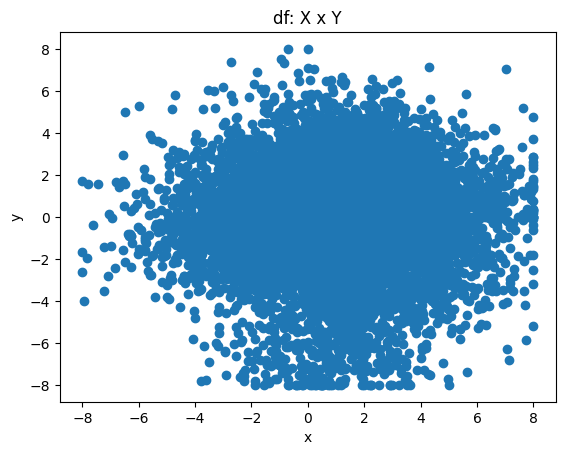

In [ ]:
# plotando o gráfico de X x Y
plt.scatter(df['x'], df['y'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('df: X x Y')
plt.xlabel('x')
plt.ylabel('y');


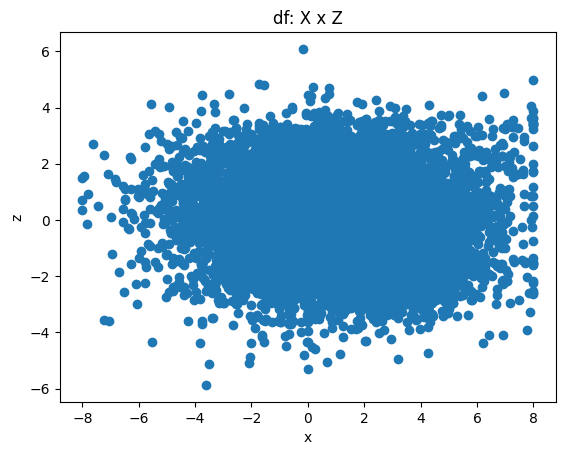

In [ ]:
# plotando o gráfico de X x Z
plt.scatter(df['x'], df['z'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('df: X x Z')
plt.xlabel('x')
plt.ylabel('z');

Com um simples grafico não descobrimos nada de novo, para uma melhor visão devemos utilizar cores.

**Histograma**

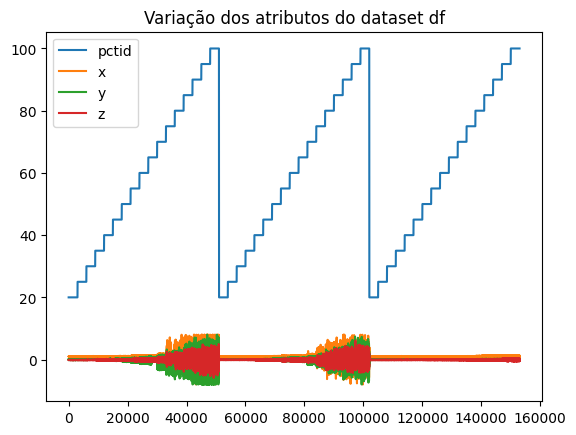

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = df.columns.drop(['wconfid'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset df
x_data = range(0, df.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['x', 'y', 'z']
    plt.plot(x_data, df[atributo], label=atributo)
    
# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset df')
plt.legend();

Agora conseguimos ver com maior clareza como esta acontecendo a variação nas colunas [x, y e z], percebemos que assim que se aproxima do pctid 60 os valores em [x, y e z] começam a ter variações ate chegar em pctid 100.

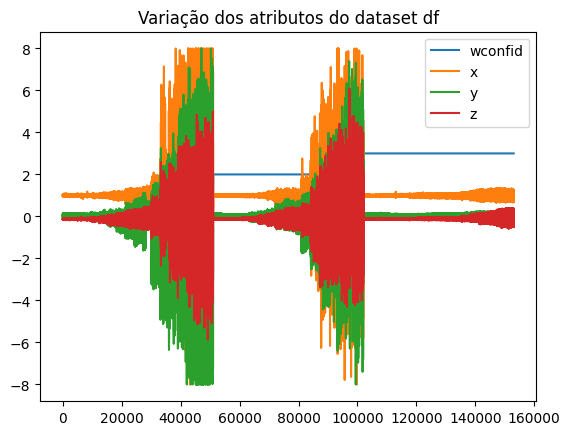

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = df.columns.drop(['pctid'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset df
x_data = range(0, df.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['x', 'y', 'z']
    plt.plot(x_data, df[atributo], label=atributo)
    
# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset df')
plt.legend();

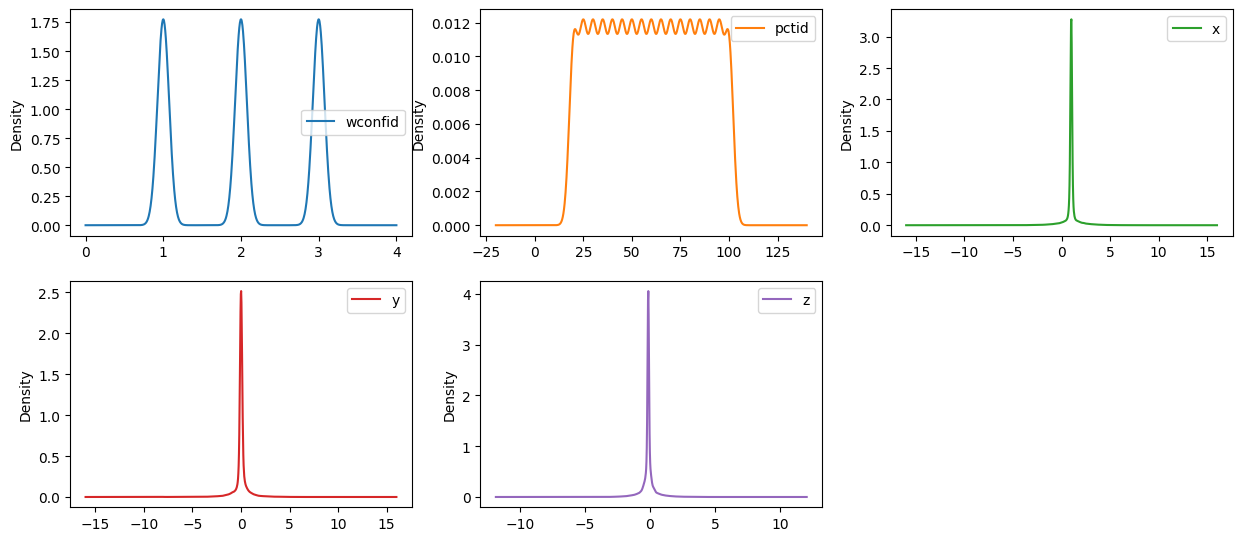

In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Agora consegumos ver como a variação nos graficos acontecem veja no wconfid ele tem 3 picos proximos do 1, 2 e 3. No gráfico pctid vemos o trabalho que começa proximo a 25 e termina em 100 e começa a decrescer. Percebmos que o gráfico x é o unico que não tem a maior sequencia em zero, ele é um pouco deslocado para direita.

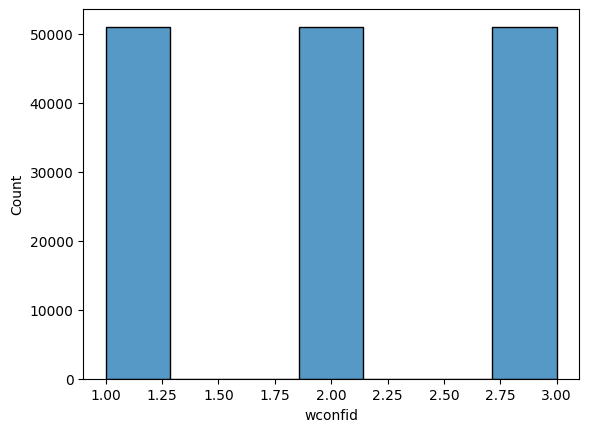

In [ ]:
# histograma com seaborn
sns.histplot(df['wconfid'], bins=7);

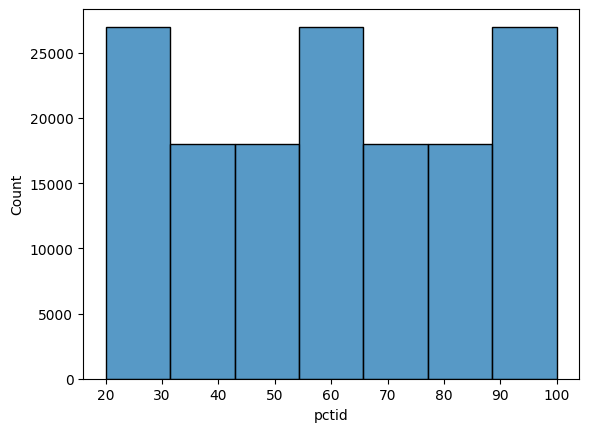

In [ ]:
# histograma com seaborn
sns.histplot(df['pctid'], bins=7);

Text(0.5, 1.0, 'z')

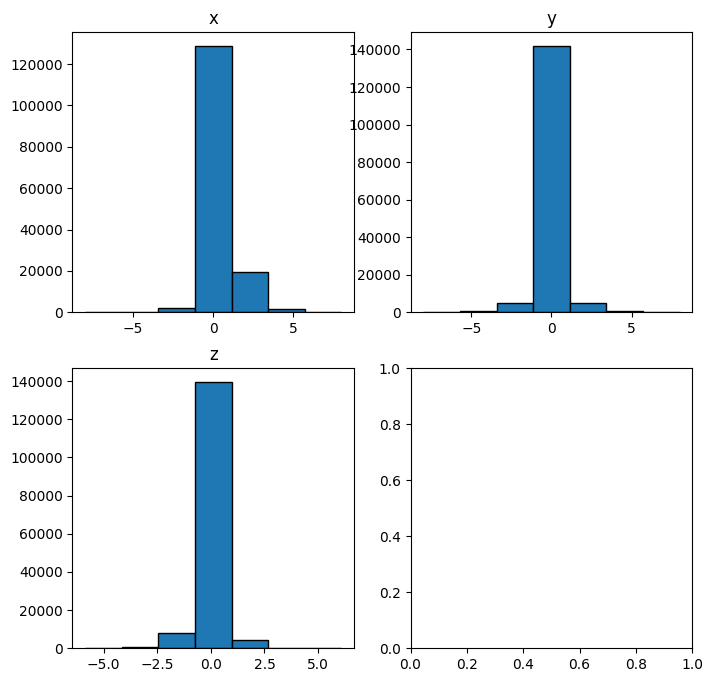

In [ ]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: histograma do x
ax[0,0].hist(df['x'], bins=7, edgecolor='black')
ax[0,0].set_title("x")

# subplot2: histograma da y
ax[0,1].hist(df['y'], bins=7, edgecolor='black')
ax[0,1].set_title("y")

# subplot3: histograma do z
ax[1,0].hist(df['z'], bins=7, edgecolor='black')
ax[1,0].set_title("z")



A função em questão é utilizada para configurar um conjunto de subplots em um grid com 1 linha e 2 colunas, além de definir o tamanho da figura. Essa configuração permite a visualização simultânea de múltiplos gráficos.

Os subplots são criados e configurados individualmente, cada um representando um histograma dos valores de uma coluna específica do DataFrame. As configurações incluem o número de bins para o histograma e a cor da borda do gráfico. Além disso, é definido um título para cada subplot, informando qual coluna está sendo representada.

No código, a primeira linha define a configuração do subplot e o tamanho da figura, armazenando os objetos em fig e ax. As demais linhas definem as configurações para cada subplot individualmente, especificando qual coluna do DataFrame será utilizada para criar o histograma e definindo o título para cada subplot.

Essa função é útil para visualizar a distribuição dos valores em cada coluna do DataFrame e identificar possíveis padrões ou discrepâncias nos dados. Além disso, a utilização de múltiplos subplots em um mesmo gráfico ajuda a economizar espaço e tornar a visualização mais clara e objetiva.

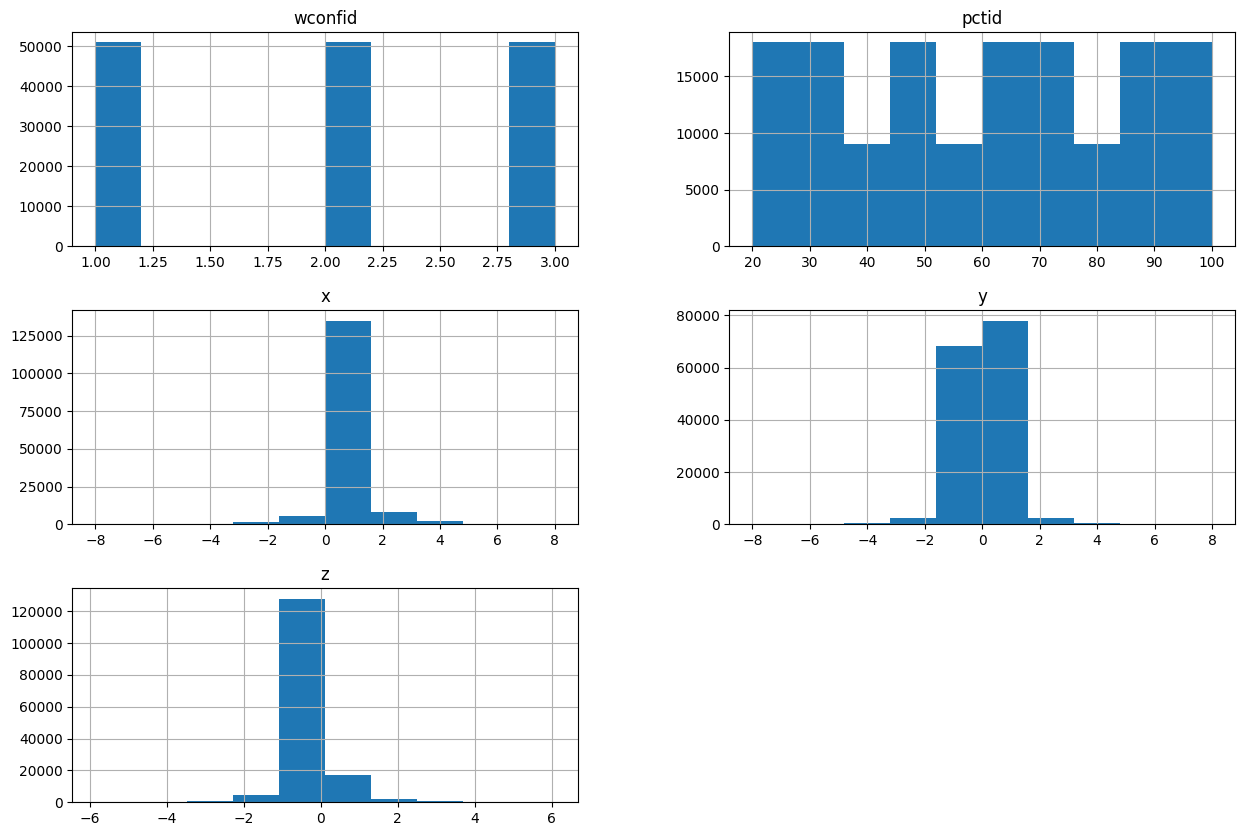

In [ ]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

Essa função é útil para obter uma visão geral da distribuição dos valores em cada coluna do DataFrame e identificar possíveis problemas ou padrões nos dados. Caso seja necessário analisar especificamente uma coluna, é possível gerar um histograma apenas para ela utilizando a mesma lógica.

Text(0.5, 1.0, 'z')

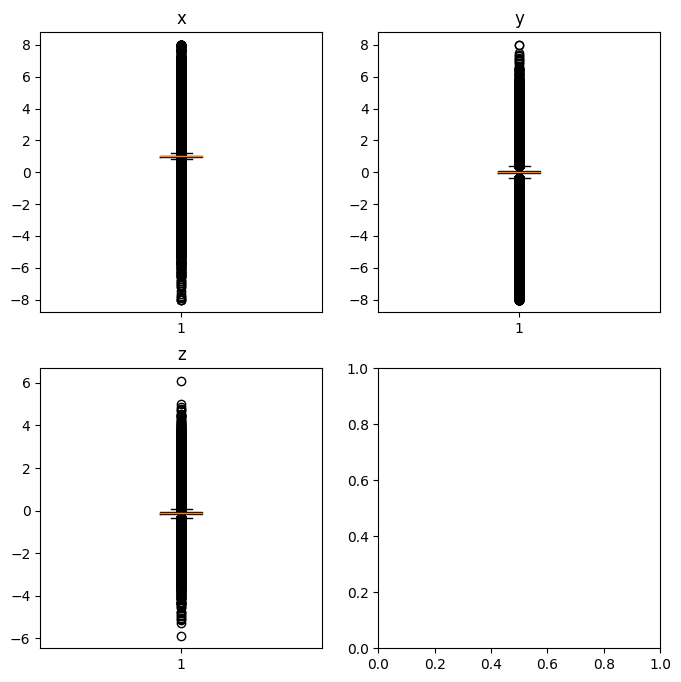

In [ ]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: boxplot do comprimento_sepala
ax[0,0].boxplot(df['x'])
ax[0,0].set_title("x")

# subplot2: boxplot da largura_sepala
ax[0,1].boxplot(df['y'])
ax[0,1].set_title("y")

# subplot3: boxplot do comprimento_petala
ax[1,0].boxplot(df['z'])
ax[1,0].set_title("z")


Cada subplot é acessado através do objeto ax e recebe o boxplot para uma determinada coluna do DataFrame df, especificada dentro dos colchetes. Além disso, é definido um título para cada subplot utilizando a função ax.set_title().

O boxplot é útil para analisar a distribuição dos dados, identificar possíveis valores discrepantes ou outliers, e comparar a distribuição de diferentes variáveis. Neste caso, ele é utilizado para comparar a distribuição das colunas x, y e z do DataFrame df.

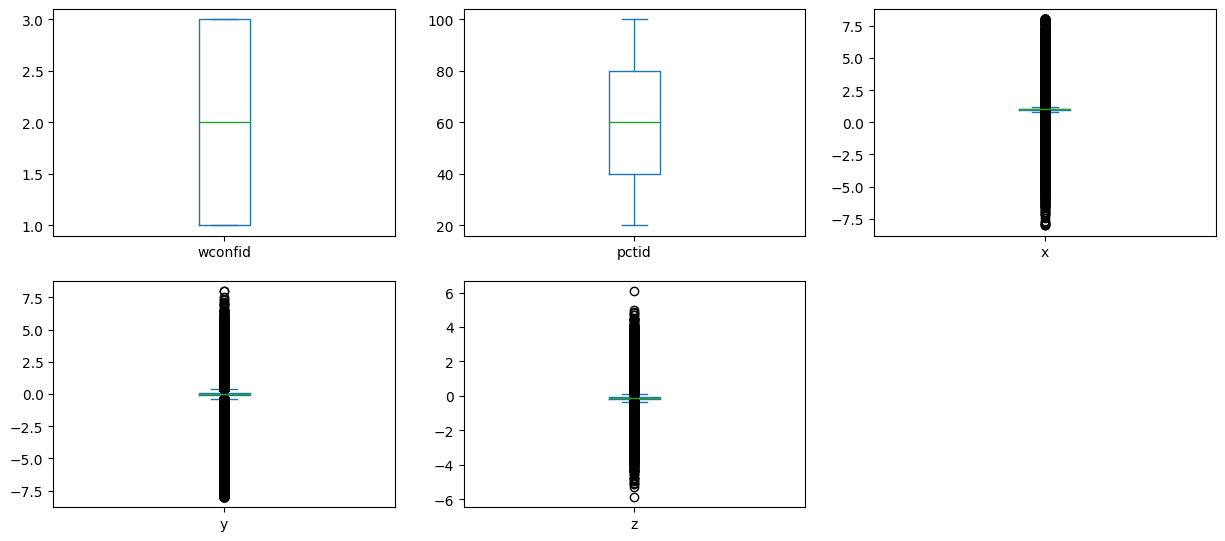

In [ ]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

O boxplot é uma representação gráfica da distribuição dos dados através de cinco estatísticas descritivas: a mediana (linha central), o primeiro e terceiro quartis (limites do retângulo), e os valores mínimo e máximo (linhas que se estendem além do retângulo). É uma ferramenta útil para analisar a distribuição dos dados e identificar possíveis valores discrepantes ou outliers.

Ao utilizar a função plot() do DataFrame, podemos visualizar múltiplas colunas em um único gráfico. No caso deste código, cada subplot representa um boxplot para cada uma das colunas do DataFrame df, permitindo visualizar a distribuição dos valores em cada uma das colunas em um único gráfico.

**Seaborn**

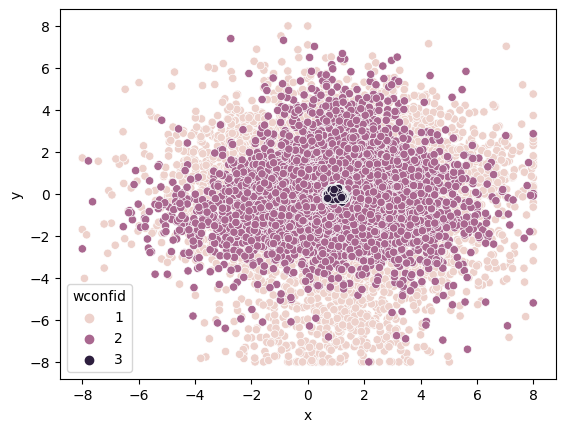

In [ ]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='x', y='y', hue='wconfid', data=df);

Agora com um gráfico colorido vemos claramente a concetração do wcofid proximo ao eixo x, deslocado levemente a direita.

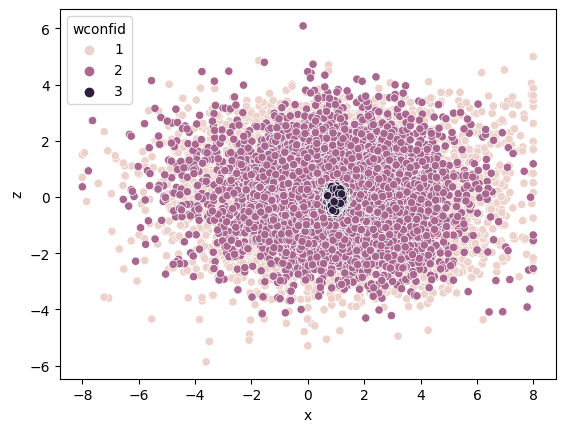

In [ ]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='x', y='z', hue='wconfid', data=df);

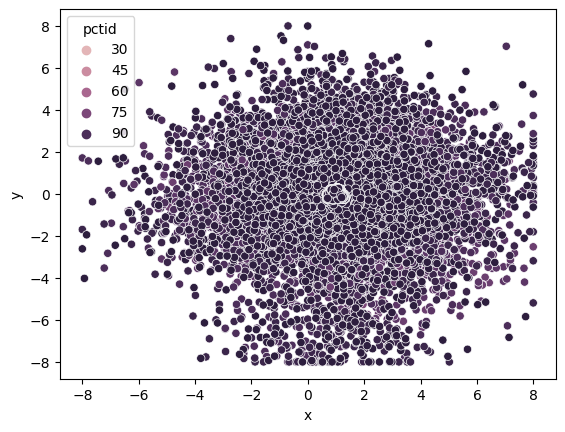

In [ ]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='x', y='y', hue='pctid', data=df);

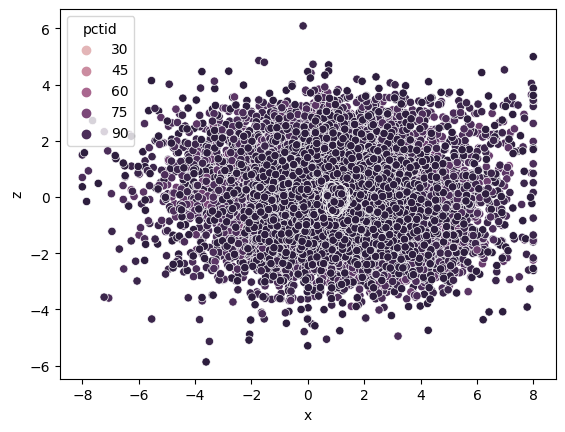

In [ ]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='x', y='z', hue='pctid', data=df);

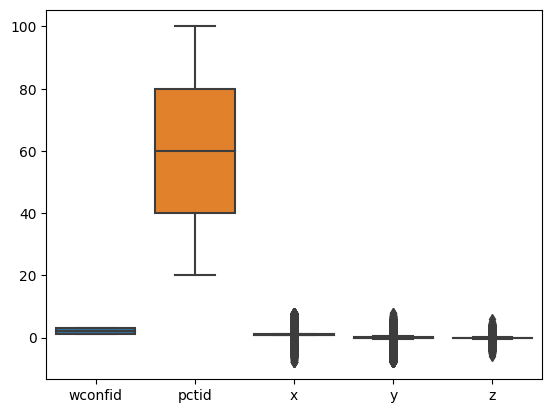

In [ ]:
# boxplot com Seaborn
sns.boxplot(data = df);

O Seaborn é uma biblioteca de visualização de dados que se integra bem com o Pandas e outras bibliotecas Python de análise de dados. Ele oferece uma interface mais simples e amigável para a criação de visualizações estatísticas complexas, como gráficos de barras, gráficos de dispersão e boxplots.

O boxplot é uma ferramenta gráfica que permite visualizar a distribuição dos dados em um conjunto de dados. Ele é composto por um retângulo que se estende do primeiro quartil (Q1) ao terceiro quartil (Q3) dos dados, com uma linha na mediana (Q2). As "whiskers" ou hastes estendem-se do retângulo até o menor e o maior valor dos dados, excluindo outliers. Outliers são pontos que estão a uma distância maior que 1,5 vezes o intervalo interquartil (IQR) da mediana.

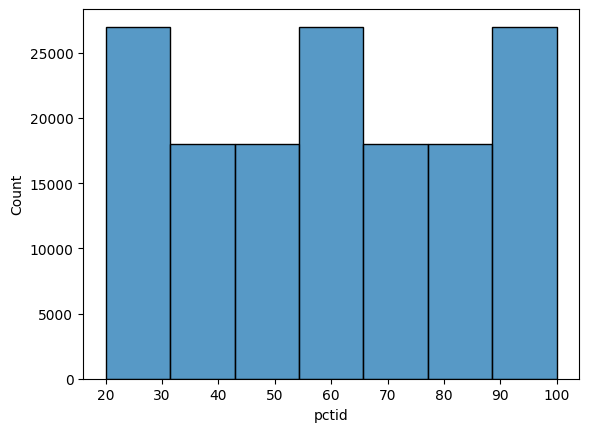

In [ ]:
# histograma com seaborn
sns.histplot(df['pctid'], bins=7);

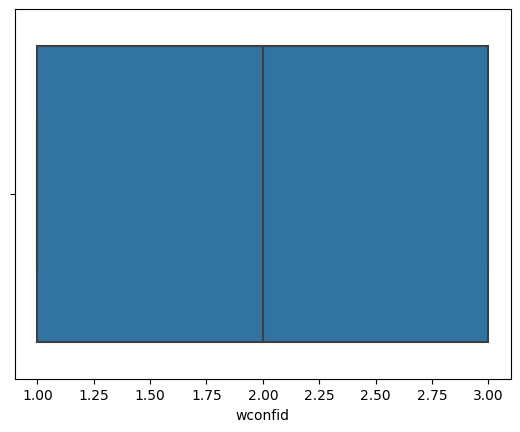

In [ ]:
# boxplot com seaborn
sns.boxplot(x=df['wconfid']);

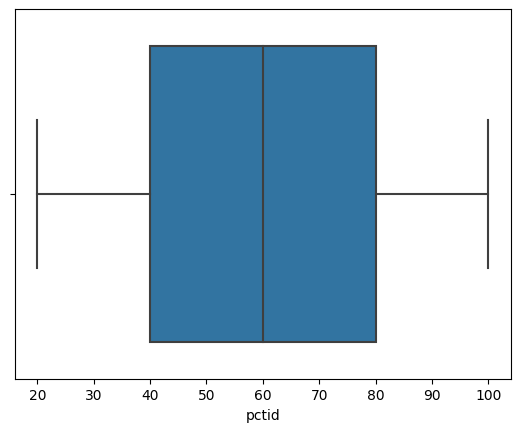

In [ ]:
# boxplot com seaborn
sns.boxplot(x=df['pctid']);

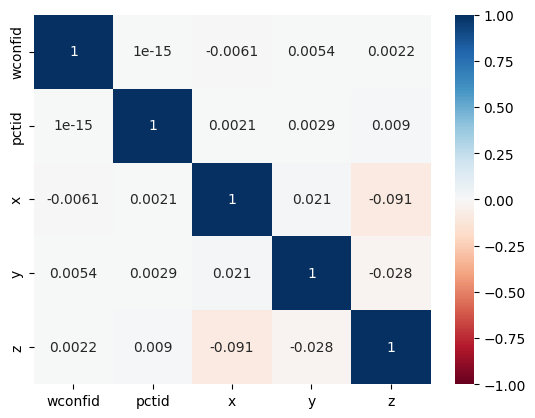

In [ ]:
# gráfico de correlação com Seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

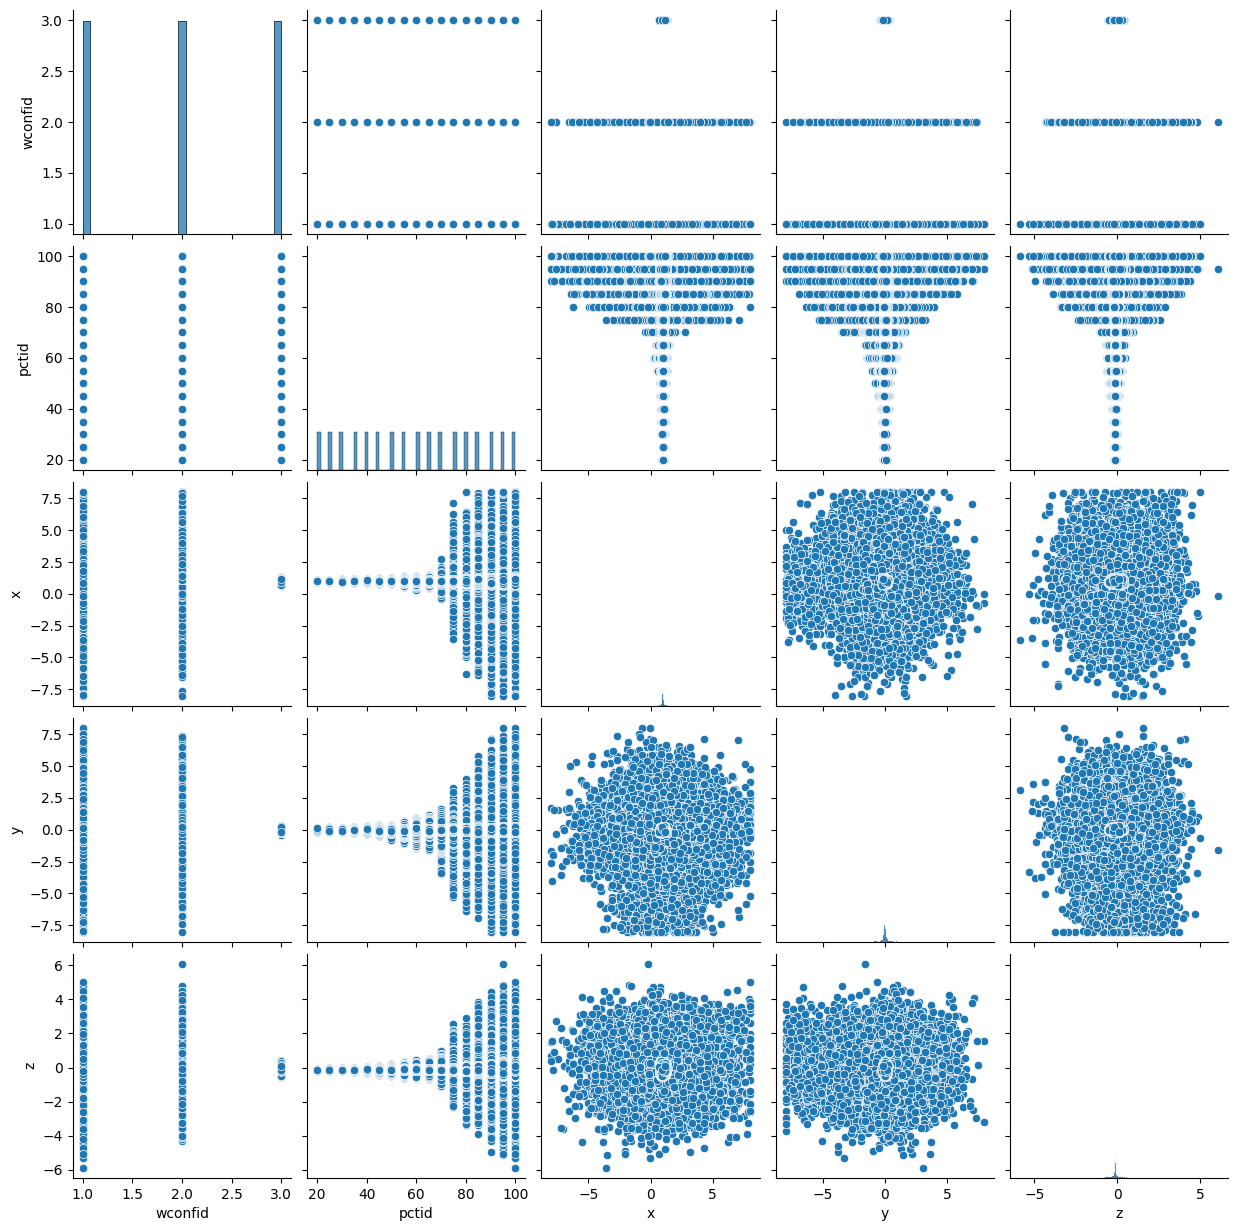

In [ ]:
# pair plot 1 com Seaborn
sns.pairplot(df);

A função pairplot() do Seaborn é usada para visualizar a relação entre várias variáveis numéricas em um conjunto de dados. Cada variável é pareada com todas as outras variáveis e um gráfico de dispersão é criado para cada par de variáveis. A diagonal principal da matriz de plots mostra um histograma da variável correspondente.

No código fornecido, a função pairplot() é aplicada no DataFrame df, gerando um conjunto de gráficos de dispersão para cada combinação de variáveis numéricas presente no conjunto de dados. Através desse conjunto de gráficos, é possível visualizar a correlação entre as variáveis e identificar padrões e tendências nos dados.

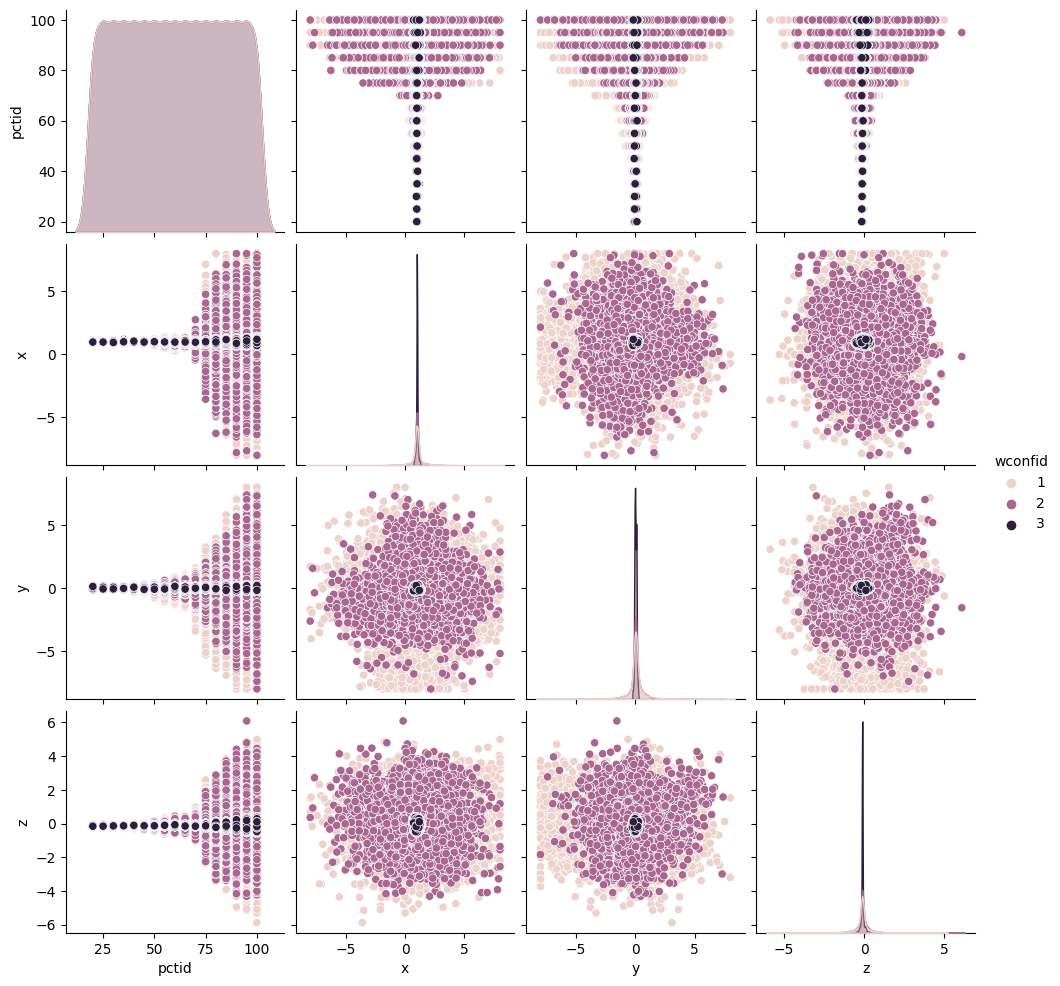

In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(df, hue = "wconfid");

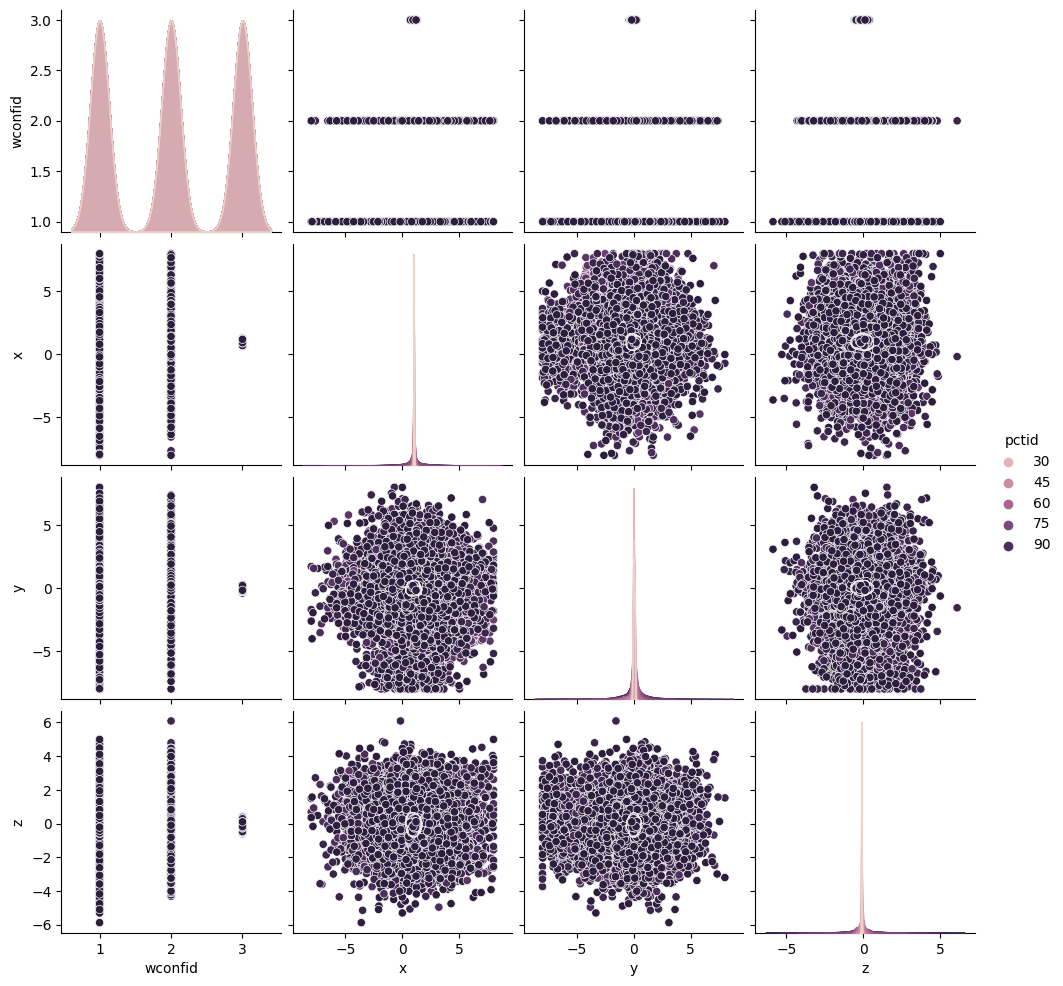

In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(df, hue = "pctid");

**FINAL**

In [ ]:
# Instalando o pandas profiling (executar apenas na 1a vez, depois comente esta linha)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
# geração do report
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A geração do relatório é realizada com a ajuda da biblioteca pandas-profiling. Essa biblioteca é usada para gerar relatórios exploratórios de dados (EDA) automáticos e interativos, que fornecem informações detalhadas sobre a estrutura, conteúdo e qualidade dos dados.

No código fornecido, a função ProfileReport() da biblioteca pandas-profiling é aplicada ao DataFrame df para gerar um relatório com informações como estatísticas descritivas, distribuição de valores, valores faltantes, correlação entre variáveis, entre outras informações relevantes. O argumento title é usado para definir o título do relatório e o argumento html é usado para configurar o estilo do relatório.

A função to_notebook_iframe() é usada para exibir o relatório gerado no formato de um iFrame na própria Jupyter Notebook. Essa função retorna um objeto IPython.display.IFrame que contém o relatório gerado, que pode ser visualizado diretamente no notebook.
WaspKB





In [ ]:
print("ola")